In [27]:
import numpy as np
from matplotlib import pyplot as plt

In [28]:
data = np.load('Data/X_red3.npy')

In [29]:
window_size = 1
kernel = np.ones(window_size) / window_size
smoothed_data = np.apply_along_axis(lambda x: np.convolve(x, kernel, mode='valid'), axis=0, arr=data)

In [30]:
smoothed_data = smoothed_data[-400:,:]

In [31]:
smoothed_data = smoothed_data[:,[0,1,2,3,5,6]]

In [32]:
smoothed_data

array([[622., 540., 467., 437., 517., 541.],
       [687., 578., 462., 446., 581., 572.],
       [624., 536., 412., 450., 565., 551.],
       ...,
       [196., 182., 176., 156., 276., 222.],
       [214., 193., 183., 137., 262., 211.],
       [188., 175., 173., 131., 282., 224.]])

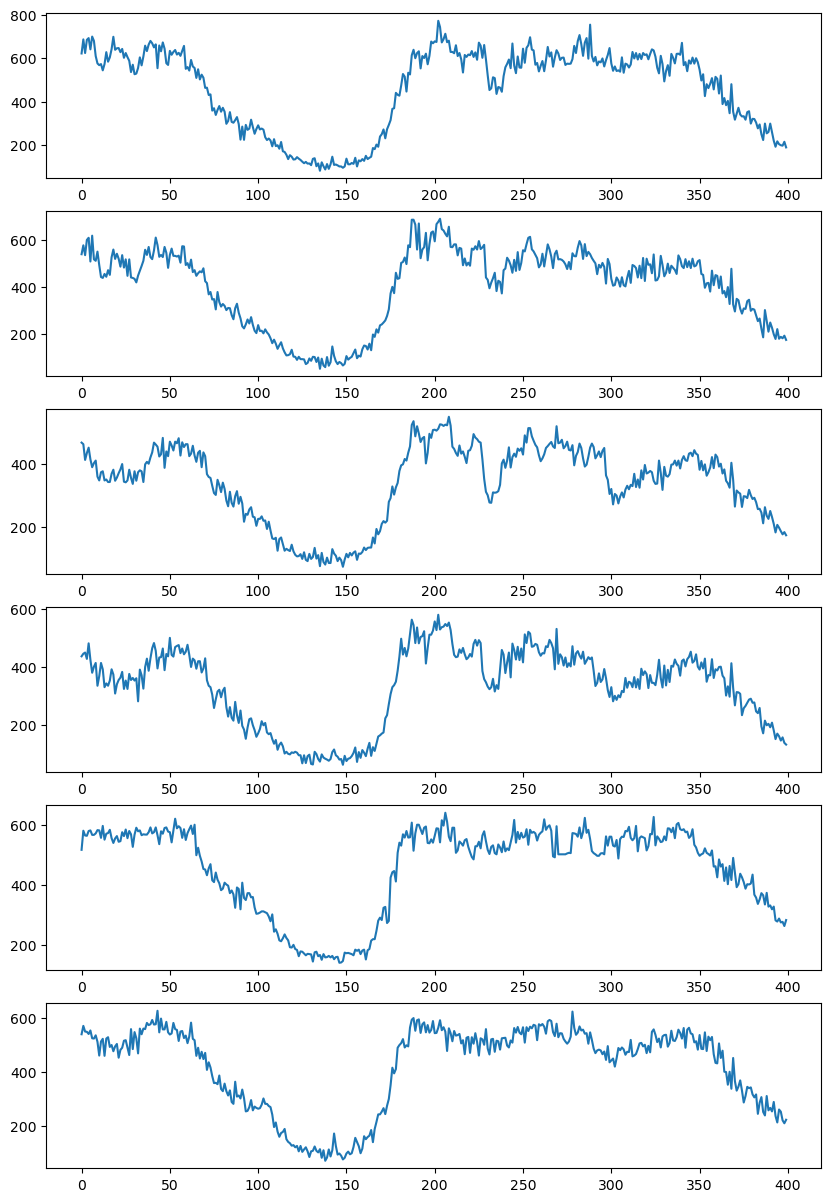

In [33]:
fig, axs = plt.subplots(nrows=smoothed_data.shape[1], ncols=1, figsize=(10, 15))
# Plot each column in a separate subplot
for i in range(smoothed_data.shape[1]):
    axs[i].plot(smoothed_data[:, i], )

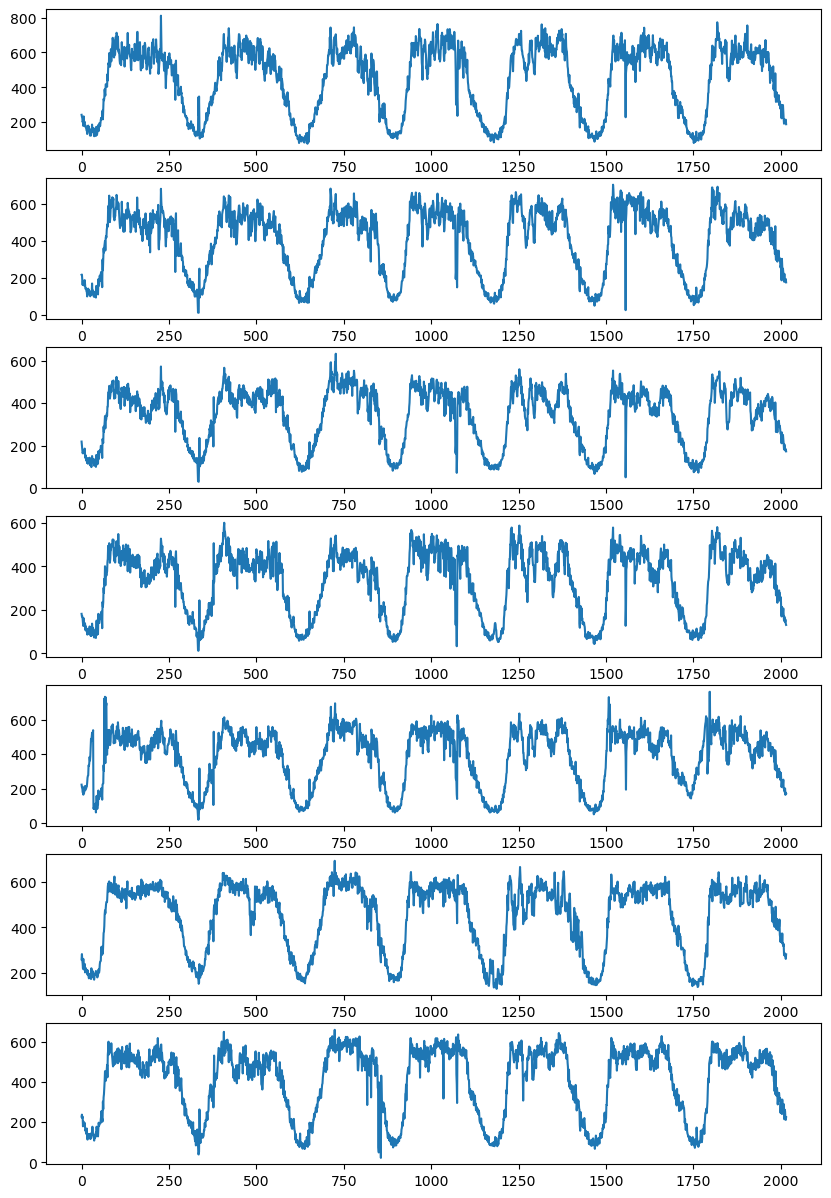

In [10]:
fig, axs = plt.subplots(nrows=data.shape[1], ncols=1, figsize=(10, 15))
# Plot each column in a separate subplot
for i in range(data.shape[1]):
    axs[i].plot(data[:, i], )

In [ ]:
def DMD(X, X_prime, r):
    U, Sigma, VT = np.linalg.svd(X, full_matrices=0)
    Ur = U[:,:r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r,:]
    Atilde = np.linalg.solve(Sigmar.T, (Ur.T @ X_prime @ VTr.T).T).T
    Lambda, W = np.linalg.eig(Atilde)
    Lambda = np.diag(Lambda)